In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Install necessary packages
!pip install pandas

In [5]:
!pip install pymongo[srv]==4.3.2 --quiet

In [6]:
!pip install matplotlib

In [7]:
!pip install scikit-learn

In [8]:
!pip install projectpro

In [9]:
!pip install nltk

In [10]:
!python --version

Python 3.12.4


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [12]:
# import libraries
import pandas as pd
#import projectpro
#from pymongo import MongoClient 

In [13]:
#conn = MongoClient ('localhost', 27017)

In [14]:
#db = conn.CancerDB

In [15]:
#print(db.list_collection_names())

In [16]:
# To find() all the entries inside collection name 'training_variants' and store it in dataframe
#training_variants = pd.DataFrame(list(db['train_variants'].find()))
#training_variants.head()

# To find() all the entries inside collection name 'train_test' and store it in dataframe
#training_text=pd.DataFrame(list(db['train_text'].find()))
#training_text.head()

In [17]:
testing_text = pd.read_csv('D:/Arvind Sir/Project_Pro/modular_code/data/test_text.csv',sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [18]:
testing_text.head()

,ID,TEXT
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...


In [19]:
traning_text = pd.read_csv('D:/Arvind Sir/Project_Pro/modular_code/data/training_text.csv',sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [20]:
traning_text.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [21]:
training_variants = pd.read_csv('D:/Arvind Sir/Project_Pro/modular_code/data/training_variants.csv')

In [22]:
training_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [23]:
test_variants = pd.read_csv('D:/Arvind Sir/Project_Pro/modular_code/data/test_variants.csv')

In [24]:
test_variants.head()

,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A


In [25]:
#missing two points in test_variants
print('train_variant', len(training_variants))
print('train_text', len(traning_text))
print('test_variant', len(test_variants))
print('test_text', len(testing_text))

train_variant 3321
train_text 3321
test_variant 5668
test_text 5668


In [26]:
training_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [27]:
traning_text.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [28]:
testing_text.head()

,ID,TEXT
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...


In [29]:
test_variants.head()

,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A


In [30]:
#Merge two dataframes in one frame depending on ID and removing _id as it gives same redundant information 
train_data = pd.merge(traning_text,training_variants, on="ID",how="left")

In [31]:
#check if there is any null value 
train_data.isnull().values.any()

True

In [32]:
#fiiling NA values in text
train_data.loc[train_data['TEXT'].isnull(),'TEXT'] = train_data['Gene'] + ' ' + train_data['Variation']
len(train_data)

3321

In [33]:
train_data.head()

,ID,TEXT,Gene,Variation,Class
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2
3,3,Recent evidence has demonstrated that acquired...,CBL,N454D,3
4,4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4


In [34]:
#create test data
# testing_variants = pd.DataFrame(list(db['test_variants'].find()))
# testing_text=pd.DataFrame(list(db['test_text'].find()))
print(len(testing_text))

5668


In [35]:
test_data = pd.merge(testing_text,test_variants, on="ID",how="left")
test_data.head()

,ID,TEXT,Gene,Variation
0,0,2. This mutation resulted in a myeloproliferat...,ACSL4,R570S
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...,NAGLU,P521L
2,2,Vascular endothelial growth factor receptor (V...,PAH,L333F
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...,ING1,A148D
4,4,Abstract Retinoblastoma is a pediatric retina...,TMEM216,G77A


In [36]:
#test_data.drop(['_id_x','_id_y'], axis=1, inplace=True)
print(len(testing_text))

5668


In [37]:
#check if there is any null value 
test_data.isnull().values.any()

#filling NaN values with Gene & Variation 
test_data.loc[test_data['TEXT'].isnull(),'TEXT'] = test_data['Gene'] + ' ' + test_data['Variation']

#drop down the two extra data samples 
test_data.dropna(inplace=True)

In [38]:
# import numpy for data manipulation and matplotlib for visualization
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

Output number and value of classes:
Number of classes 9
Value of classes [1, 2, 3, 4, 5, 6, 7, 8, 9]
**************************************************************


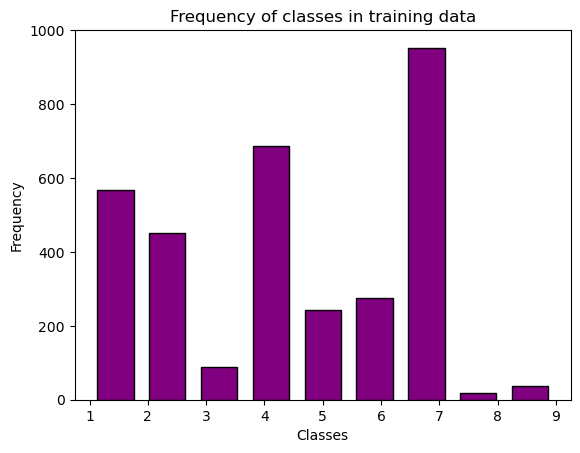

Class
7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: count, dtype: int64

In [39]:
#Since we need to predict classes, lets see how many classes we have
print('Output number and value of classes:')
classes =sorted(set(train_data['Class']))
print('Number of classes',len(classes))
print('Value of classes',classes)
print('**************************************************************')

fig, ax = plt.subplots()
# Set title
ax.set_title("Frequency of classes in training data")
  
# adding labels
ax.set_xlabel('Classes')
ax.set_ylabel('Frequency')
plt.hist(train_data['Class'], bins=9, align='mid', color='purple', edgecolor='black',rwidth=0.7)
plt.show()

train_data['Class'].value_counts()

Output number and value of Genes:
Number of genes 264
Value of genes ['ABL1', 'ACVR1', 'AGO2', 'AKT1', 'AKT2', 'AKT3', 'ALK', 'APC', 'AR', 'ARAF', 'ARID1A', 'ARID1B', 'ARID2', 'ARID5B', 'ASXL1', 'ASXL2', 'ATM', 'ATR', 'ATRX', 'AURKA', 'AURKB', 'AXIN1', 'AXL', 'B2M', 'BAP1', 'BARD1', 'BCL10', 'BCL2', 'BCL2L11', 'BCOR', 'BRAF', 'BRCA1', 'BRCA2', 'BRD4', 'BRIP1', 'BTK', 'CARD11', 'CARM1', 'CASP8', 'CBL', 'CCND1', 'CCND2', 'CCND3', 'CCNE1', 'CDH1', 'CDK12', 'CDK4', 'CDK6', 'CDK8', 'CDKN1A', 'CDKN1B', 'CDKN2A', 'CDKN2B', 'CDKN2C', 'CEBPA', 'CHEK2', 'CIC', 'CREBBP', 'CTCF', 'CTLA4', 'CTNNB1', 'DDR2', 'DICER1', 'DNMT3A', 'DNMT3B', 'DUSP4', 'EGFR', 'EIF1AX', 'ELF3', 'EP300', 'EPAS1', 'EPCAM', 'ERBB2', 'ERBB3', 'ERBB4', 'ERCC2', 'ERCC3', 'ERCC4', 'ERG', 'ERRFI1', 'ESR1', 'ETV1', 'ETV6', 'EWSR1', 'EZH2', 'FAM58A', 'FANCA', 'FANCC', 'FAT1', 'FBXW7', 'FGF19', 'FGF3', 'FGF4', 'FGFR1', 'FGFR2', 'FGFR3', 'FGFR4', 'FLT1', 'FLT3', 'FOXA1', 'FOXL2', 'FOXO1', 'FOXP1', 'FUBP1', 'GATA3', 'GLI1', 'GNA11', '

Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
         ... 
RYBP        1
MDM2        1
CTLA4       1
ARID1A      1
FAM58A      1
Name: count, Length: 264, dtype: int64

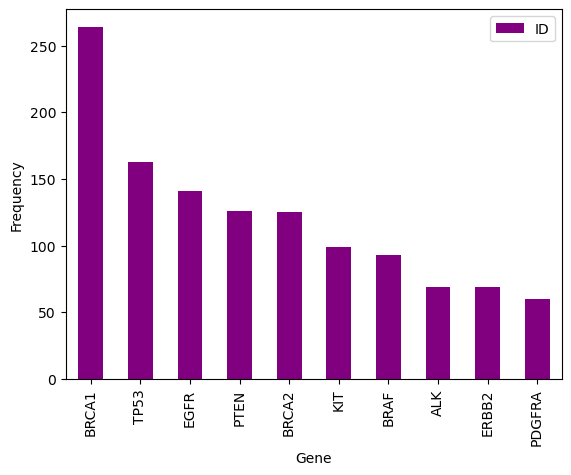

In [40]:
print('Output number and value of Genes:')
genes= sorted(set(train_data['Gene']))

print('Number of genes',len(genes))
print('Value of genes',genes)
print('**************************************************************')

#Due to having 264 gene, lets find the most frequent 10 genes
df_variation = train_data.groupby(by="Gene")
df_variation_plot = df_variation.count().sort_values(by='ID',ascending=False).head(10).plot(kind='bar', y ='ID', ylabel = 'Frequency',xlabel='Gene',color='purple')

train_data['Gene'].value_counts()

Output number and value of variation:
Number of variaions 2996
Value of variaions ['1_2009trunc', '2010_2471trunc', '256_286trunc', "3' Deletion", '385_418del', '422_605trunc', '533_534del', '534_536del', '550_592del', '560_561insER', '596_619splice', '963_D1010splice', '981_1028splice', 'A1020V', 'A1022E', 'A1065T', 'A1066V', 'A1099T', 'A111P', 'A1131T', 'A113_splice', 'A1170V', 'A11_G12insGA', 'A1200V', 'A120S', 'A121E', 'A121P', 'A121V', 'A122*', 'A1234T', 'A126D', 'A126G', 'A126S', 'A126V', 'A134D', 'A1374V', 'A1459P', 'A146T', 'A146V', 'A148T', 'A149P', 'A1519T', 'A151T', 'A159T', 'A161S', 'A161T', 'A1669S', 'A1685S', 'A1701P', 'A1708E', 'A1708V', 'A171V', 'A1752P', 'A1752V', 'A1789S', 'A1789T', 'A1823T', 'A1830T', 'A1843P', 'A1843T', 'A18D', 'A197T', 'A19V', 'A2034V', 'A205T', 'A209T', 'A211D', 'A232V', 'A2351G', 'A23E', 'A2425T', 'A246P', 'A263V', 'A2643G', 'A2717S', 'A272V', 'A2770T', 'A290T', 'A298T', 'A339V', 'A347T', 'A349P', 'A34D', 'A36P', 'A389T', 'A391E', 'A39P', 'A40E',

Variation
Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
                        ..
H1094R                   1
M1250T                   1
PTPRZ1-MET Fusion        1
H1106D                   1
K83E                     1
Name: count, Length: 2996, dtype: int64

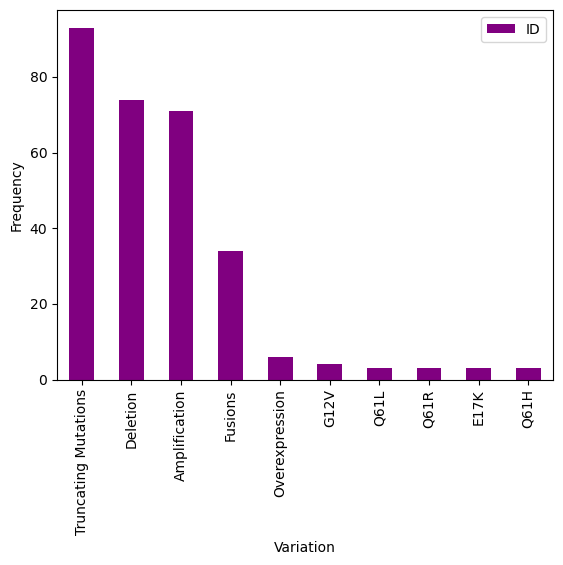

In [41]:
#Variations analysis
print('Output number and value of variation:')
variation =sorted(set(train_data['Variation']))
print('Number of variaions',len(variation))
print('Value of variaions',variation)
print('**************************************************************')

#Since we have 2996 variation, lets check top frequent 10 variations
df_variation = train_data.groupby(by="Variation")
df_variation_plot = df_variation.count().sort_values(by='ID',ascending=False).head(10).plot(kind='bar', y ='ID', ylabel = 'Frequency',xlabel='Variation',color='purple')

train_data['Variation'].value_counts()

In [42]:
# Import Libraries
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer 

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moumita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Moumita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Moumita\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [43]:
#data from 
def clean_text(text):
    '''Preprocess the text by following some cleaning steps'''
    
    #remove these special characters
    REPLACE_BY_SPACE_RE = re.compile('[/(){}[]|@,;]')
    BAD_SYMBOLSRE = re.compile('[^a-z]')
    #initialize Lemmatization
    lemmatizer = WordNetLemmatizer()
    #remove stopwords
    STOPWORDS = set(stopwords.words('english'))
    
    text=str(text)
    text = text.lower()
    #remove single characters 
    text = re.sub(r"\s+[a-zA-Z]\s+", " ", text)

    text = BAD_SYMBOLSRE.sub(' ', text)
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    #remove stopp words and do Lemmatization
    cleaned_text = ' '.join( lemmatizer.lemmatize(word) for word in text.split() if word not in STOPWORDS)

    return cleaned_text

In [44]:
# clean text
train_data['TEXT']= train_data['TEXT'].apply(clean_text)
train_data['TEXT']

0       cyclin dependent kinase cdks regulate variety ...
1       abstract background non small cell lung cancer...
2       abstract background non small cell lung cancer...
3       recent evidence demonstrated acquired uniparen...
4       oncogenic mutation monomeric casitas b lineage...
                              ...                        
3316    introduction myelodysplastic syndrome md heter...
3317    introduction myelodysplastic syndrome md heter...
3318    runt related transcription factor gene runx al...
3319    runx aml gene frequent target chromosomal tran...
3320    frequent mutation associated leukemia recurren...
Name: TEXT, Length: 3321, dtype: object

In [45]:
# length of sentences
train_data['TEXT']
lens=[len(sent.split()) for sent in train_data['TEXT'] ]
print(lens)

[3912, 3704, 3704, 3502, 3961, 3961, 3961, 9973, 8043, 4082, 3961, 8353, 17556, 8353, 3961, 4392, 5506, 2285, 3961, 2285, 7665, 3961, 3961, 3502, 3502, 3502, 4420, 863, 8359, 863, 863, 12607, 863, 6188, 11414, 3702, 3702, 1777, 1777, 3949, 3949, 11791, 1777, 12802, 1210, 2543, 853, 2543, 5506, 1210, 1632, 1632, 2693, 2543, 1632, 2543, 4012, 2543, 2842, 2160, 2543, 1210, 2160, 3903, 2543, 1632, 3903, 6420, 12574, 6420, 10407, 4254, 7245, 2641, 12775, 4254, 7942, 7942, 4087, 7942, 4087, 7942, 1659, 1659, 3295, 1659, 11339, 11339, 1609, 3368, 10259, 2491, 3368, 2491, 4126, 2942, 12500, 4212, 4389, 4481, 19430, 11418, 7781, 12038, 10164, 12646, 3476, 7588, 4862, 11286, 17405, 3476, 9172, 11832, 11046, 12066, 12066, 9973, 12283, 10063, 1368, 13977, 7869, 7583, 7583, 797, 797, 7583, 7869, 5509, 7869, 12307, 8916, 4989, 7583, 30903, 3172, 3425, 8801, 20333, 289, 18648, 5268, 6451, 18491, 289, 4393, 16703, 7823, 8095, 16370, 2412, 7932, 2291, 5938, 2231, 3713, 1788, 10184, 8348, 13631, 2231, 7

In [46]:
y_true=train_data['Class'].astype(int)
del train_data['Class']

In [47]:
#we need to do train,val,test for evaluation 
from sklearn.model_selection import train_test_split
# split the data into train and remaining by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_rem, y_train, y_rem = train_test_split(train_data, y_true, stratify=y_true, test_size=0.2)
# split the train data into test and validation by maintaining same distribution of output varaible 'y_rem' 
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, stratify=y_rem, test_size=0.5)

In [48]:
print(len(X_train))
print(len(vX_al))
print(len(X_test))

2656
332
333


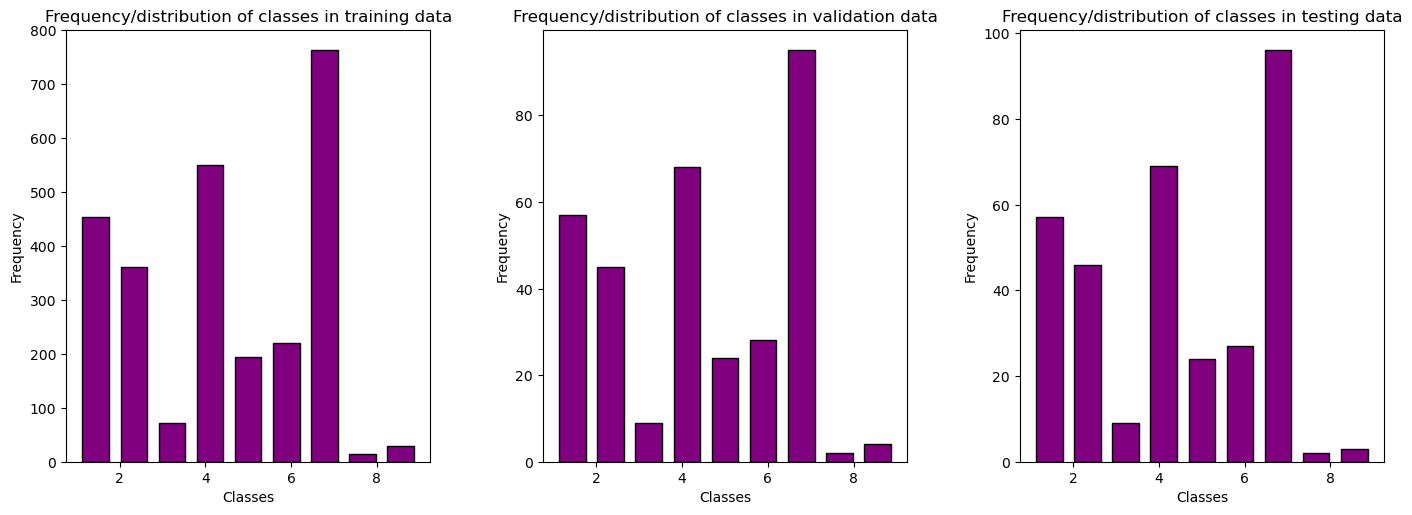

In [49]:
fig, ax = plt.subplots(1,3,figsize=(15, 6))

fig.tight_layout(pad=5.0)
# Set title
ax[0].set_title("Frequency/distribution of classes in training data")
  
# adding labels
ax[0].set_xlabel('Classes')
ax[0].set_ylabel('Frequency')
ax[0].hist(sorted(y_train), bins=9, align='mid', color='purple', edgecolor='black',rwidth=0.7)


ax[1].set_title("Frequency/distribution of classes in validation data")
# adding labels
ax[1].set_xlabel('Classes')
ax[1].set_ylabel('Frequency')
ax[1].hist(sorted(y_val), bins=9, align='mid', color='purple', edgecolor='black',rwidth=0.7)


ax[2].set_title("Frequency/distribution of classes in testing data")
# adding labels
ax[2].set_xlabel('Classes')
ax[2].set_ylabel('Frequency')
ax[2].hist(sorted(y_test), bins=9, align='mid', color='purple', edgecolor='black',rwidth=0.7)

plt.show()

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [51]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [52]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn. metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
#projectpro.checkpoint('479936')
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
%matplotlib inline

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [55]:
def evaluate_model(model,test_features, y_truth,datatype=''):
  #evaluate diffrent models using confusion matrix and log loss
  # predict on the test data
  pred=model.predict(test_features)

  # create a pretty matrix with predicted and actual data
  cm = confusion_matrix(y_truth, pred)
  pred_prob= model.predict_proba(test_features)
  # calculate log loss
  eval = log_loss(y_truth,pred_prob) 
  print("Log Loss for "+datatype+" data")
  print(eval)
  print('**************************************************************************')


In [56]:
#Since Genes and variations are speciefec we will represent them with one hot encoder 
#Using get dummes to convert categorical data into dummy or indicator variables.
train_gene_feature_onehotCoding = pd.get_dummies(X_train["Gene"],drop_first=True)
 
val_gene_feature_onehotCoding = pd.get_dummies(X_val["Gene"],drop_first=True)
#we use reindex to handle the unknown categories which didnt appear in the training data
val_gene_feature_onehotCoding = val_gene_feature_onehotCoding.reindex(columns= train_gene_feature_onehotCoding.columns, fill_value=0)

test_gene_feature_onehotCoding = pd.get_dummies(X_test["Gene"],drop_first=True)
test_gene_feature_onehotCoding = test_gene_feature_onehotCoding.reindex(columns= train_gene_feature_onehotCoding.columns, fill_value=0)

In [57]:
# build a random logistic regression model
loj = LogisticRegression(random_state=0)
loj_model = loj.fit(train_gene_feature_onehotCoding, y_train)
evaluate_model(loj_model,train_gene_feature_onehotCoding,y_train,'training')
evaluate_model(loj_model,val_gene_feature_onehotCoding,y_val,'evaluation')
evaluate_model(loj_model,test_gene_feature_onehotCoding,y_test,'testing')


Log Loss for training data
1.099680329310185
**************************************************************************
Log Loss for evaluation data
1.1615885045837884
**************************************************************************
Log Loss for testing data
1.1306929725567705
**************************************************************************


In [58]:
train_variation_feature_onehotCoding = pd.get_dummies(X_train["Variation"],drop_first=True)

#method will remove all the new columns and add the missing columns with their values as zeros. Now we can apply our Model M on this reindexed data to make predictions.
val_variation_feature_onehotCoding = pd.get_dummies(X_val["Variation"],drop_first=True)
val_variation_feature_onehotCoding = val_variation_feature_onehotCoding.reindex(columns= train_variation_feature_onehotCoding.columns, fill_value=0)

test_variation_feature_onehotCoding = pd.get_dummies(X_test["Variation"],drop_first=True)
test_variation_feature_onehotCoding = test_variation_feature_onehotCoding.reindex(columns= train_variation_feature_onehotCoding.columns, fill_value=0)

In [59]:
# fit logistic regression model
loj = LogisticRegression(random_state=0)
loj_model = loj.fit(train_variation_feature_onehotCoding, y_train)

evaluate_model(loj_model,train_variation_feature_onehotCoding,y_train, 'training')
evaluate_model(loj_model,val_variation_feature_onehotCoding,y_val,'validation')
evaluate_model(loj_model,test_variation_feature_onehotCoding,y_test,'testing')

Log Loss for training data
1.1557134844802261
**************************************************************************
Log Loss for validation data
1.7685760846350707
**************************************************************************
Log Loss for testing data
1.7379598594970356
**************************************************************************


In [60]:
#concatnate gene and variation
gene_variation_train=pd.concat([train_variation_feature_onehotCoding,train_gene_feature_onehotCoding],axis=1)
gene_variation_val= pd.concat([val_variation_feature_onehotCoding,val_gene_feature_onehotCoding],axis=1)
gene_variation_test=pd.concat([test_variation_feature_onehotCoding,test_gene_feature_onehotCoding],axis=1)

In [61]:
# fit and evaluate logistic regression on gene and variation together
loj = LogisticRegression(random_state=0)
loj_model = loj.fit(gene_variation_train, y_train)
evaluate_model(loj_model,gene_variation_train,y_train,'training')
evaluate_model(loj_model,gene_variation_val,y_val,'validation')
evaluate_model(loj_model,gene_variation_test,y_test,'testing')


Log Loss for training data
0.694533968622437
**************************************************************************
Log Loss for validation data
1.1315414186933241
**************************************************************************
Log Loss for testing data
1.0924007206215742
**************************************************************************


In [62]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

In [63]:
# building a Vectorizer with gnoring terms that appear in less than 400 documents".
#TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.


text_vectorizer = TfidfVectorizer(min_df=400,stop_words="english")

train_text_feature_onehotCoding = text_vectorizer.fit_transform(X_train['TEXT'])
val_text_feature_onehotCoding=text_vectorizer.transform(X_val["TEXT"])
test_text_feature_onehotCoding=text_vectorizer.transform(X_test["TEXT"])

#normalizing to give unit norm
train_text_feature_onehotCoding=normalize(train_text_feature_onehotCoding, axis=0)
val_text_feature_onehotCoding=normalize(val_text_feature_onehotCoding, axis=0)
test_text_feature_onehotCoding=normalize(test_text_feature_onehotCoding, axis=0)

# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names_out()

In [64]:
X_val["TEXT"].head()

2863    mutation screening breast ovarian cancer predi...
2307    recent work highlighted role jak janus kinase ...
2670    genetic screening breast ovarian cancer suscep...
2300    pediatric acute lymphoblastic leukemia heterog...
2532    genetic screening breast ovarian cancer suscep...
Name: TEXT, dtype: object

In [65]:
loj = LogisticRegression(random_state=0)
loj_model = loj.fit(train_text_feature_onehotCoding, y_train)
evaluate_model(loj_model,train_text_feature_onehotCoding,y_train,'training')
evaluate_model(loj_model,val_text_feature_onehotCoding,y_val,'validation')
evaluate_model(loj_model,test_text_feature_onehotCoding,y_test,'testing')

Log Loss for training data
0.9544476057820844
**************************************************************************
Log Loss for validation data
1.2925491688158242
**************************************************************************
Log Loss for testing data
1.2183750780066378
**************************************************************************


In [66]:
train_text_feature_onehotCoding=pd.DataFrame(train_text_feature_onehotCoding.toarray())
val_text_feature_onehotCoding=pd.DataFrame(val_text_feature_onehotCoding.toarray())
test_text_feature_onehotCoding=pd.DataFrame(test_text_feature_onehotCoding.toarray())

In [67]:
train_text_feature_onehotCoding

,0,1,2,3,4,5,6,7,8,9,...,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174
0,0.000000,0.000000,0.000000,0.000000,0.009651,0.005180,0.000000,0.003359,0.005790,0.000000,...,0.014380,0.003014,0.023070,0.00000,0.001874,0.001402,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.019071,0.001901,0.019546,0.006643,0.009805,0.000000,0.000000,0.000000,0.008580,...,0.000000,0.000000,0.006806,0.00000,0.000000,0.000965,0.002504,0.000000,0.008396,0.042783
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.011506,0.149524,0.000000,0.000000,0.000000,...,0.000000,0.008928,0.000000,0.00000,0.000000,0.012460,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.031341,0.000000,0.009033,0.015570,0.008379,...,0.038669,0.008106,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.032803,0.000000
4,0.019933,0.000000,0.010485,0.000000,0.009160,0.047936,0.000000,0.019130,0.021983,0.011831,...,0.000000,0.001907,0.009385,0.00000,0.000000,0.000000,0.001151,0.021436,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.028462,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2652,0.000000,0.000000,0.000000,0.000000,0.000000,0.005185,0.000000,0.000000,0.000000,0.000000,...,0.057578,0.000000,0.000000,0.00000,0.000000,0.005615,0.000000,0.000000,0.000000,0.049774
2653,0.002617,0.000000,0.003097,0.010615,0.010823,0.001452,0.005806,0.003767,0.000000,0.000000,...,0.000000,0.000563,0.003696,0.00706,0.000000,0.014153,0.000000,0.000000,0.000000,0.000000
2654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.016698,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
#incase it is organized depending on indeces
gene_variation_train.reset_index(drop=True, inplace=True)
gene_variation_val.reset_index(drop=True, inplace=True)
gene_variation_test.reset_index(drop=True, inplace=True)


In [69]:
gene_variation_train

,2010_2471trunc,256_286trunc,3' Deletion,385_418del,422_605trunc,533_534del,534_536del,550_592del,560_561insER,596_619splice,...,TSC1,TSC2,U2AF1,VEGFA,VHL,WHSC1,WHSC1L1,XPO1,XRCC2,YAP1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2652,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2653,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2654,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
gene_variation_text_train=pd.concat([train_text_feature_onehotCoding,gene_variation_train],axis=1)
gene_variation_text_val= pd.concat([val_text_feature_onehotCoding,gene_variation_val],axis=1)
gene_variation_text_test=pd.concat([test_text_feature_onehotCoding,gene_variation_test],axis=1)

In [71]:
train_text_feature_onehotCoding

,0,1,2,3,4,5,6,7,8,9,...,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174
0,0.000000,0.000000,0.000000,0.000000,0.009651,0.005180,0.000000,0.003359,0.005790,0.000000,...,0.014380,0.003014,0.023070,0.00000,0.001874,0.001402,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.019071,0.001901,0.019546,0.006643,0.009805,0.000000,0.000000,0.000000,0.008580,...,0.000000,0.000000,0.006806,0.00000,0.000000,0.000965,0.002504,0.000000,0.008396,0.042783
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.011506,0.149524,0.000000,0.000000,0.000000,...,0.000000,0.008928,0.000000,0.00000,0.000000,0.012460,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.031341,0.000000,0.009033,0.015570,0.008379,...,0.038669,0.008106,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.032803,0.000000
4,0.019933,0.000000,0.010485,0.000000,0.009160,0.047936,0.000000,0.019130,0.021983,0.011831,...,0.000000,0.001907,0.009385,0.00000,0.000000,0.000000,0.001151,0.021436,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.028462,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2652,0.000000,0.000000,0.000000,0.000000,0.000000,0.005185,0.000000,0.000000,0.000000,0.000000,...,0.057578,0.000000,0.000000,0.00000,0.000000,0.005615,0.000000,0.000000,0.000000,0.049774
2653,0.002617,0.000000,0.003097,0.010615,0.010823,0.001452,0.005806,0.003767,0.000000,0.000000,...,0.000000,0.000563,0.003696,0.00706,0.000000,0.014153,0.000000,0.000000,0.000000,0.000000
2654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.016698,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [72]:
# Convert DataFrames to NumPy arrays to avoid dealing with feature names
gene_variation_text_train = gene_variation_text_train.values
gene_variation_text_val = gene_variation_text_val.values
gene_variation_text_test = gene_variation_text_test.values

In [73]:
loj = LogisticRegression(random_state=0)
loj_model = loj.fit(gene_variation_text_train, y_train)
evaluate_model(loj_model,gene_variation_text_train,y_train, 'Logistic Regression training')
evaluate_model(loj_model,gene_variation_text_val,y_val,'Logistic Regression validation')
evaluate_model(loj_model,gene_variation_text_test,y_test,'Logistic Regression testing')

Log Loss for Logistic Regression training data
0.5228754809263784
**************************************************************************
Log Loss for Logistic Regression validation data
1.0376647906680128
**************************************************************************
Log Loss for Logistic Regression testing data
0.9951692295497231
**************************************************************************


In [74]:
# build a random forest model on the merged features
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(max_depth=2, random_state=0)
clf_rnd.fit(gene_variation_text_train, y_train)
evaluate_model(clf_rnd,gene_variation_text_train,y_train,'Random Forest Classifier training')
evaluate_model(clf_rnd,gene_variation_text_val,y_val,'Random Forest Classifier validation')
evaluate_model(clf_rnd,gene_variation_text_test,y_test,'Random Forest Classifier testing')

Log Loss for Random Forest Classifier training data
1.6054514412473422
**************************************************************************
Log Loss for Random Forest Classifier validation data
1.6418438444282049
**************************************************************************
Log Loss for Random Forest Classifier testing data
1.6295480976073484
**************************************************************************


In [149]:
# build knn model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(gene_variation_text_train, y_train)
evaluate_model(neigh,gene_variation_text_train,y_train,'K Nearest neighbour training')
evaluate_model(neigh,gene_variation_text_val,y_val,'K Nearest neighbour validation')
evaluate_model(neigh,gene_variation_text_test,y_test,'K Nearest neighbour testing')

Log Loss for K Nearest neighbour training data
0.6993663239458868
**************************************************************************
Log Loss for K Nearest neighbour validation data
2.8889367325450834
**************************************************************************
Log Loss for K Nearest neighbour testing data
2.6217315386312174
**************************************************************************


In [151]:
# build a naive bayes algo
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(gene_variation_text_train, y_train)
evaluate_model(gnb,gene_variation_text_train,y_train,'naive bayes training')
evaluate_model(gnb,gene_variation_text_val,y_val,'naive bayes  validation')
evaluate_model(gnb,gene_variation_text_test,y_test,'naive bayes  testing')

Log Loss for naive bayes training data
0.6578866077328931
**************************************************************************
Log Loss for naive bayes  validation data
18.347522357713256
**************************************************************************
Log Loss for naive bayes  testing data
20.02425188284295
**************************************************************************


In [153]:
def test_logstic(model,pen,solv,test_features,y_truth,datatype=''):
  pred_prob= model.predict_proba(test_features)
  eval = log_loss(y_truth,pred_prob) 
  print("Log Loss for "+datatype+" data"+" with penalty "+str(pen)+" and solver "+str(solv))
  print(eval)

In [155]:
solvers=['newton-cg','sag','saga','lbfgs']
C=[5,2,1,5,0.0.05]
for solv  in solvers:
  for c in C:
    print('******************************************')
    loj = LogisticRegression(C=c,solver=solv,random_state=0)
    loj_model = loj.fit(gene_variation_text_train, y_train)
    test_logstic(loj_model,c,solv,gene_variation_text_train,y_train, 'Logistic Regression training')
    test_logstic(loj_model,c,solv,gene_variation_text_val,y_val,'Logistic Regression validation')
    test_logstic(loj_model,c,solv,gene_variation_text_test,y_test,'Logistic Regression testing')


******************************************
Log Loss for Logistic Regression training data with penalty 5 and solver newton-cg
0.18238071707012787
Log Loss for Logistic Regression validation data with penalty 5 and solver newton-cg
1.2452556089004552
Log Loss for Logistic Regression testing data with penalty 5 and solver newton-cg
1.194780836560841
******************************************
Log Loss for Logistic Regression training data with penalty 2 and solver newton-cg
0.3456881249157818
Log Loss for Logistic Regression validation data with penalty 2 and solver newton-cg
1.1081788813785878
Log Loss for Logistic Regression testing data with penalty 2 and solver newton-cg
1.0604876807575099
******************************************
Log Loss for Logistic Regression training data with penalty 1 and solver newton-cg
0.5221869138005121
Log Loss for Logistic Regression validation data with penalty 1 and solver newton-cg
1.0378451300400193
Log Loss for Logistic Regression testing data with 

In [159]:
'''test unseen data'''
test_data['TEXT']= test_data['TEXT'].apply(clean_text)
#Extract features

test_variation_onehotCoding = pd.get_dummies(test_data['Variation'],drop_first=True)
test_variation_onehotCoding = test_variation_onehotCoding.reindex(columns= train_variation_feature_onehotCoding .columns, fill_value=0)

test_gene_onehotCoding = pd.get_dummies(test_data['Gene'],drop_first=True)
test_gene_onehotCoding = test_gene_onehotCoding.reindex(columns= train_gene_feature_onehotCoding .columns, fill_value=0)

test_text_feature_onehotCoding=text_vectorizer.transform( test_data['TEXT'])
test_text_feature_onehotCoding=normalize(test_text_feature_onehotCoding, axis=0)


gene_variation_feature=pd.concat([test_variation_onehotCoding,test_gene_onehotCoding],axis=1) 
text_feature= pd.DataFrame(test_text_feature_onehotCoding.toarray())
gene_variation_feature.reset_index(drop=True, inplace=True)
gene_variation_text_feature=pd.concat([text_feature,gene_variation_feature],axis=1)

gene_variation_text_feature.columns = gene_variation_text_feature.columns.astype(str)

loj = LogisticRegression(random_state=0)
loj_model = loj.fit(gene_variation_text_train, y_train)
pred_prob= loj_model.predict(gene_variation_text_feature)
print('Predicted classes of the 1st 20 classes of the unseen data')
print(pred_prob[:20])

Predicted classes of the 1st 20 classes of the unseen data
[7 4 7 7 4 2 7 4 7 7 7 7 6 7 2 7 7 7 7 7]
